In [4]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import keras

Using TensorFlow backend.


In [ ]:
# %%time

# from pathlib import Path
# from pprint import pprint
# from keras.preprocessing import image
# from keras.utils import to_categorical
# from sklearn.model_selection import train_test_split

# data_dir = Path('/dataset/Tooth Brushing Dataset/image data/')
# train_csv = data_dir / 'train.csv'
# image_dir = data_dir / 'train'

# def load_img(path, size=(224, 224)):
#     pil = image.load_img(path, target_size=size)
#     return np.array(pil, dtype=np.float32)

# paths = sorted(image_dir.iterdir(), key=lambda x: int(x.stem))
# X = np.array([load_img(x) for x in paths])
# label = np.loadtxt(str(train_csv), delimiter=',', dtype=np.int32)[:, 1] - 1
# Y = to_categorical(label, num_classes=16)

# x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2)
# std = image.ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# std.fit(x_train)
# X_train = std.standardize(x_train)
# X_test = std.standardize(x_val)

# print(x_train.shape, y_train.shape)
# print(x_val.shape, y_val.shape)

# np.save('x_train.npy', x_train)
# np.save('y_train.npy', y_train)
# np.save('x_val.npy', x_val)
# np.save('y_val.npy', y_val)

In [5]:
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
x_val = np.load('x_val.npy')
y_val = np.load('y_val.npy')

In [8]:
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(8, kernel_size=(11, 11), activation='relu', input_shape=(224, 224, 3)))
model.add(Conv2D(16, kernel_size=(7, 7), activation='relu'))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Flatten())
model.add(Dense(30))
model.add(Dropout(0.3))
model.add(Dense(16, activation='softmax'))

sgd = SGD(lr=0.001, decay=0.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()
hist = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=100, epochs=40)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 214, 214, 8)       2912      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 208, 208, 16)      6288      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 206, 206, 32)      4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 51, 51, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 83232)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 30)                2496990   
_________________________________________________________________
dropout_3 (Dropout)          (None, 30)                0         
__________

/home/applyACC/persons/amoshuangyc/tooth/venv/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


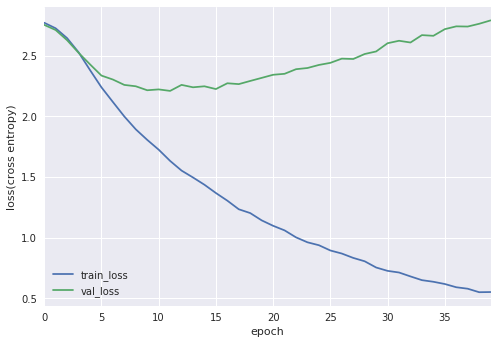

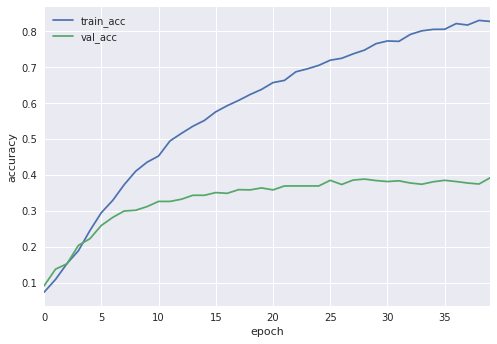

In [9]:
df = pd.DataFrame()
df['train_loss'] = hist.history['loss']
df['val_loss'] = hist.history['val_loss']
ax = df.plot(kind='line')
ax.set_xlabel('epoch')
ax.set_ylabel('loss(cross entropy)')

df = pd.DataFrame()
df['train_acc'] = hist.history['acc']
df['val_acc'] = hist.history['val_acc']
ax = df.plot(kind='line')
ax.set_xlabel('epoch')
ax.set_ylabel('accuracy')